In [9]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [10]:
# G = nx.Graph()
# G.add_nodes_from([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

In [11]:
graph = {'1': [{'2':'15'}, {'4':'7'}, {'5':'10'}],
        '2': [{'3':'9'}, {'4':'11'}, {'6':'9'}],
        '3': [{'5':'12'}, {'6':'7'}],
        '4': [{'5':'8'}, {'6':'14'}],
        '5': [{'6':'8'}]}

In [12]:
new_graph = nx.Graph()
new_graph.add_nodes_from([0, 1, 2, 3, 4, 5])
for source, targets in graph.items():
    for inner_dict in targets:
        assert len(inner_dict) == 1
        new_graph.add_edge(int(source) - 1, int(list(inner_dict)[0]) - 1, weight=int(list(inner_dict.values())[0]))
adjacency_matrix = nx.adjacency_matrix(new_graph)

In [13]:
adjacency_matrix.toarray()

array([[ 0, 15,  0,  7, 10,  0],
       [15,  0,  9, 11,  0,  9],
       [ 0,  9,  0,  0, 12,  7],
       [ 7, 11,  0,  0,  8, 14],
       [10,  0, 12,  8,  0,  8],
       [ 0,  9,  7, 14,  8,  0]], dtype=int64)

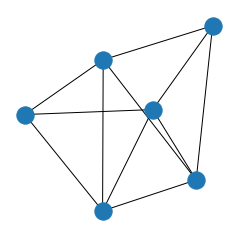

In [14]:
plt.rcParams['figure.figsize']=[3,3]
nx.draw(new_graph)

In [15]:
len_path = dict(nx.all_pairs_dijkstra_path(new_graph))
len_path

{0: {0: [0], 1: [0, 1], 3: [0, 3], 4: [0, 4], 5: [0, 4, 5], 2: [0, 4, 2]},
 1: {1: [1], 0: [1, 0], 2: [1, 2], 3: [1, 3], 5: [1, 5], 4: [1, 5, 4]},
 2: {2: [2], 1: [2, 1], 4: [2, 4], 5: [2, 5], 3: [2, 1, 3], 0: [2, 4, 0]},
 3: {3: [3], 0: [3, 0], 1: [3, 1], 4: [3, 4], 5: [3, 5], 2: [3, 4, 2]},
 4: {4: [4], 0: [4, 0], 2: [4, 2], 3: [4, 3], 5: [4, 5], 1: [4, 5, 1]},
 5: {5: [5], 1: [5, 1], 2: [5, 2], 3: [5, 3], 4: [5, 4], 0: [5, 4, 0]}}

In [17]:
len_path[0][2]

[0, 4, 2]

In [21]:
len(len_path)

6

In [ ]:
def run_simulation(n = 100, path_dict):
    nodes = np.zeros(len(path_dict))
    edges = 